In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preparation

- Select only the following features
    - Make,
    - Model,
    - Year,
    - Engine HP,
    - Engine Cylinders,
    - Transmission Type,
    - Vehicle Style,
    - highway MPG,
    - city mpg,
    - MSRP
- Fill in the missing values of the selected features with 0.
- Rename **MSRP** variable to **price**

In [3]:
base = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']

In [4]:
df_base = df[base]
df_base

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [5]:
df_base.columns = df_base.columns.str.lower().str.replace(' ','_')
df_base.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
categorical_columns = list(df_base.dtypes[df_base.dtypes == 'object'].index)
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

In [7]:
for c in categorical_columns:
    df_base[c] = df_base[c].str.lower().str.replace(' ', '_')

C:\Users\Bolu\AppData\Local\Temp\ipykernel_11684\2641386081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[c] = df_base[c].str.lower().str.replace(' ', '_')


In [8]:
numerical_columns = list(df_base.dtypes[df_base.dtypes != 'object'].index)
numerical_columns

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'msrp']

In [9]:
df_base.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,msrp
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,26.637485,19.733255,4.059474e+04
std,7.579740,109.19187,1.780559,8.863001,8.987798,6.010910e+04
min,1990.000000,55.00000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,354.000000,137.000000,2.065902e+06


In [10]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [11]:
df_base.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [12]:
df_base['engine_hp'].fillna(0, inplace=True)
df_base['engine_cylinders'].fillna(0, inplace=True)

C:\Users\Bolu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
df_base.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [14]:
df_base.rename(columns = {'msrp': 'price'}, inplace=True)

C:\Users\Bolu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
df_base

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


## Question 1

What is the most frequent observation (mode) for the column **transmission_type**?

In [16]:
df_base.transmission_type.value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [18]:
numerical_columns = list(df_base.dtypes[df_base.dtypes != 'object'].index)
numerical_columns

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

<AxesSubplot:>

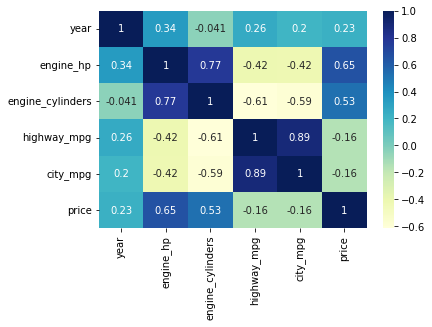

In [19]:
corr_matrix = df_base[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'YlGnBu')

### Make price binary

In [20]:
df_base['above_average'] = (df_base.price > df_base.price.mean()).astype(int)

C:\Users\Bolu\AppData\Local\Temp\ipykernel_11684\3916195636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['above_average'] = (df_base.price > df_base.price.mean()).astype(int)


In [21]:
df_base.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


### Split the data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
np.random.seed(42)

df_full_train, df_test = train_test_split(df_base, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

In [31]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [42]:
from sklearn.metrics import mutual_info_score

def mutual_information_score(series):
    return mutual_info_score(series, y_train)

In [43]:
df_train[categorical_columns].apply(mutual_information_score).round(2)

make                 0.24
model                0.47
transmission_type    0.02
vehicle_style        0.08
dtype: float64

In [48]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
train_dicts

[{'make': 'toyota',
  'model': 'highlander_hybrid',
  'transmission_type': 'automatic',
  'vehicle_style': '4dr_suv',
  'year': 2016,
  'engine_hp': 280.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 28,
  'city_mpg': 27,
  'price': 50485},
 {'make': 'chevrolet',
  'model': 'impala_limited',
  'transmission_type': 'automatic',
  'vehicle_style': 'sedan',
  'year': 2014,
  'engine_hp': 300.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 30,
  'city_mpg': 18,
  'price': 26840},
 {'make': 'buick',
  'model': 'regal',
  'transmission_type': 'automatic',
  'vehicle_style': 'sedan',
  'year': 2016,
  'engine_hp': 259.0,
  'engine_cylinders': 4.0,
  'highway_mpg': 27,
  'city_mpg': 19,
  'price': 36490},
 {'make': 'volkswagen',
  'model': 'cc',
  'transmission_type': 'automated_manual',
  'vehicle_style': 'sedan',
  'year': 2015,
  'engine_hp': 280.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 25,
  'city_mpg': 17,
  'price': 43575},
 {'make': 'dodge',
  'model': 'grand_caravan',
  'transmiss

In [49]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [51]:
val_dicts = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
val_dicts

[{'make': 'nissan',
  'model': '370z',
  'transmission_type': 'automatic',
  'vehicle_style': 'coupe',
  'year': 2015,
  'engine_hp': 350.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 26,
  'city_mpg': 19,
  'price': 43290},
 {'make': 'pontiac',
  'model': 'firebird',
  'transmission_type': 'unknown',
  'vehicle_style': '2dr_hatchback',
  'year': 2000,
  'engine_hp': 305.0,
  'engine_cylinders': 8.0,
  'highway_mpg': 23,
  'city_mpg': 15,
  'price': 6175},
 {'make': 'acura',
  'model': 'rdx',
  'transmission_type': 'automatic',
  'vehicle_style': '4dr_suv',
  'year': 2015,
  'engine_hp': 273.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 27,
  'city_mpg': 19,
  'price': 36495},
 {'make': 'kia',
  'model': 'sedona',
  'transmission_type': 'automatic',
  'vehicle_style': 'passenger_minivan',
  'year': 2016,
  'engine_hp': 276.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 24,
  'city_mpg': 18,
  'price': 26400},
 {'make': 'nissan',
  'model': 'truck',
  'transmission_type': 'manual',
  

In [52]:
X_val = dv.transform(val_dicts)

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [58]:
y_pred = model.predict(X_val)

In [59]:
(y_pred == y_val).mean()

0.9974821653378095

In [62]:
df_pred = pd.DataFrame()
# df_pred['probability'] = model.predict_proba(X_val)
df_pred['prediction'] = y_pred
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [65]:
df_pred.correct.value_counts()

True     2377
False       6
Name: correct, dtype: int64